In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [4]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

In [6]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)   # Pass through function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

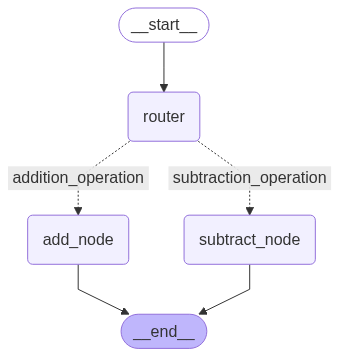

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
initial_state_1 = AgentState(number1 = 10, operation = "-", number2= 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [12]:
result = app.invoke({"number1": 10, "operation": "+", "number2": 5})
result

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}

In [13]:
result['finalNumber']

15

## Exercise

In [65]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [66]:
class AgentState(TypedDict):
    number_1: int
    operation_1: str
    number_2: int
    finalNumber_1: int

    number_3: int
    operation_2: str
    number_4: int
    finalNumber_2: int

In [67]:
def add_1(state: AgentState) -> AgentState:
    """This node add the 2 numbers"""
    state['finalNumber_1'] = state['number_1'] + state['number_2']
    return state

def subtract_1(state: AgentState) -> AgentState:
    """This node subtract the 2 numbers"""
    state['finalNumber_1'] = state['number_1'] - state['number_2']
    return state


def decide_next_node_1(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state['operation_1'] == "+":
        return "addition_operation"
    elif state["operation_1"] == "-":
        return "subtraction_operation"

In [68]:
def add_2(state: AgentState) -> AgentState:
    """This node add the 2 numbers"""
    state['finalNumber_2'] = state['number_3'] + state['number_4']
    return state

def subtract_2(state: AgentState) -> AgentState:
    """This node subtract the 2 numbers"""
    state['finalNumber_2'] = state['number_3'] - state['number_4']
    return state


def decide_next_node_2(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state['operation_2'] == "+":
        return "addition_operation_2"
    elif state["operation_2"] == "-":
        return "subtraction_operation_2"

In [69]:
graph = StateGraph(AgentState)

graph.add_node("add_node_1", add_1)
graph.add_node("subtract_node_1", subtract_1)
graph.add_node("router", lambda state: state)

graph.add_node("add_node_2", add_2)
graph.add_node("subtract_node_2", subtract_2)
graph.add_node("router_2", lambda state: state)

graph.add_edge(START, "router")



graph.add_conditional_edges(
    "router",
    decide_next_node_1,
    {
        "addition_operation": "add_node_1",
        "subtraction_operation": "subtract_node_1"
    }
)

graph.add_edge("add_node_1", "router_2")
graph.add_edge("subtract_node_1", "router_2")

graph.add_conditional_edges(
    "router_2",
    decide_next_node_2,
    {
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2"
    }
)


graph.add_edge("add_node_2", END)
graph.add_edge("subtract_node_2", END)

app = graph.compile()

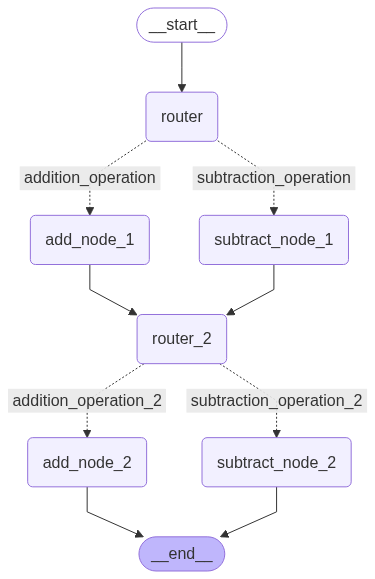

In [70]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [71]:
initial_state_1 = AgentState(number_1 = 5, operation_1='+', number_2 = 5,
                            number_3 = 10, operation_2 = '-', number_4 = 4,
                            finalNumber_1=0, finalNumber_2=0)

In [72]:
print(app.invoke(initial_state_1))

{'number_1': 5, 'operation_1': '+', 'number_2': 5, 'finalNumber_1': 10, 'number_3': 10, 'operation_2': '-', 'number_4': 4, 'finalNumber_2': 6}


In [73]:
initial_state_1 = AgentState(number_1 = 15, operation_1='-', number_2 = 5)

In [74]:
print(app.invoke(initial_state_1))

KeyError: 'operation_2'